In [18]:
input_data = open("input08.txt") do file
    all_numbers = Int64[]
    data = readlines(file)
    for line in data
        entries = collect(line)
        numbers = map(x->parse(Int64, x), entries)
        append!(all_numbers, numbers)
    end
    all_numbers
end


15000-element Array{Int64,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 0
 0
 0
 2
 2
 1
 2
 1
 1
 1
 0
 2

In [49]:
import Base.@kwdef
import Base.iterate
using StatsBase
@kwdef struct Image
    data::Array{Int64, 1}
    width::Int64
    height::Int64
end

Base.iterate(I::Image, layer::Int64=0) = 
((layer+1) * I.width * I.height > length(I.data)) ? 
    nothing : 
    (I.data[1+layer*I.width*I.height:(layer+1)*I.width*I.height], layer+1)

image = Image(data=input_data, width=25, height=6)

function find_minimum_zero_count(image)
    all_zero_counts = []
    ones_twos_counts = []
    for (i, layer) in enumerate(image)
        counts = countmap(layer)
        count_zero = counts[0]
        push!(all_zero_counts, count_zero)
        push!(ones_twos_counts, (counts[1], counts[2]))
    end
    minimum_zeros = argmin(all_zero_counts)
    x = ones_twos_counts[minimum_zeros]
    x[1] * x[2]
end
find_minimum_zero_count(image)

1560

In [81]:
function overlay(image)
    combined_image = ones(Int8, image.width * image.height) * 2
    for layer in image
        where_cond = combined_image .== 2
        combined_image[where_cond] = layer[where_cond]
    end
    combined_image
end
image_overlayed = overlay(image)
println(image_overlayed)
image_reshaped = transpose(reshape(image_overlayed, image.width, image.height))

[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]


6×25 LinearAlgebra.Transpose{Int64,Array{Int64,2}}:
 1  0  0  1  0  0  1  1  0  0  0  1  1  0  0  1  0  0  1  0  1  0  0  1  0
 1  0  0  1  0  1  0  0  1  0  1  0  0  1  0  1  0  0  1  0  1  0  0  1  0
 1  0  0  1  0  1  0  0  0  0  1  0  0  0  0  1  0  0  1  0  1  1  1  1  0
 1  0  0  1  0  1  0  1  1  0  1  0  0  0  0  1  0  0  1  0  1  0  0  1  0
 1  0  0  1  0  1  0  0  1  0  1  0  0  1  0  1  0  0  1  0  1  0  0  1  0
 0  1  1  0  0  0  1  1  1  0  0  1  1  0  0  0  1  1  0  0  1  0  0  1  0

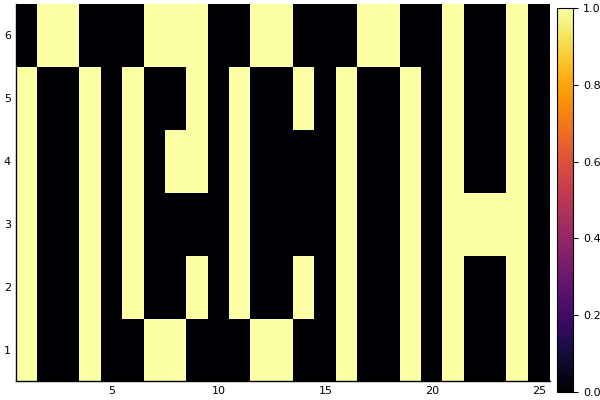

In [80]:
using Plots
pyplot()
heatmap(image_reshaped)
